# Polynomial Regression

## Importing necessary libraries and packages

In [1]:
from sklearn.preprocessing import PolynomialFeatures # regression algorithm
from sklearn.linear_model import LinearRegression # regression algorithm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # accuracy metric
import numpy as np # data processing
import pandas as pd # data processing 
import matplotlib.pyplot as plt # data plotting

## Importing the csv file as DataFrame

In [2]:
df = pd.read_csv("Point_Values.csv")
df.head()

,Points,Values
0,-3,-4143
1,-2,-338
2,-1,-7
3,0,0
4,1,1


## Exploratory Data Analysis

Formal information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Points  8 non-null      int64
 1   Values  8 non-null      int64
dtypes: int64(2)
memory usage: 256.0 bytes


Desciption of the dataset

In [4]:
df.describe()

,Points,Values
count,8.00000,8.0000
mean,0.50000,605.0000
std,2.44949,3546.0759
min,-3.00000,-4143.0000
25%,-1.25000,-89.7500
50%,0.50000,0.5000
75%,2.25000,195.7500
max,4.00000,8548.0000


Checking if any null value exists

In [5]:
df.isnull().sum()

Points    0
Values    0
dtype: int64

Columns of the dataset

In [6]:
df.columns

Index(['Points', 'Values'], dtype='object')

Correlations between the variables

In [7]:
df.corr()

,Points,Values
Points,1.000000,0.776612
Values,0.776612,1.000000


## Now taking 2 parts from the dataset
### X: which contains only the <b>Points</b> column<br>Y: which contains only the <b>Values</b> column 

In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Visualisation of the data

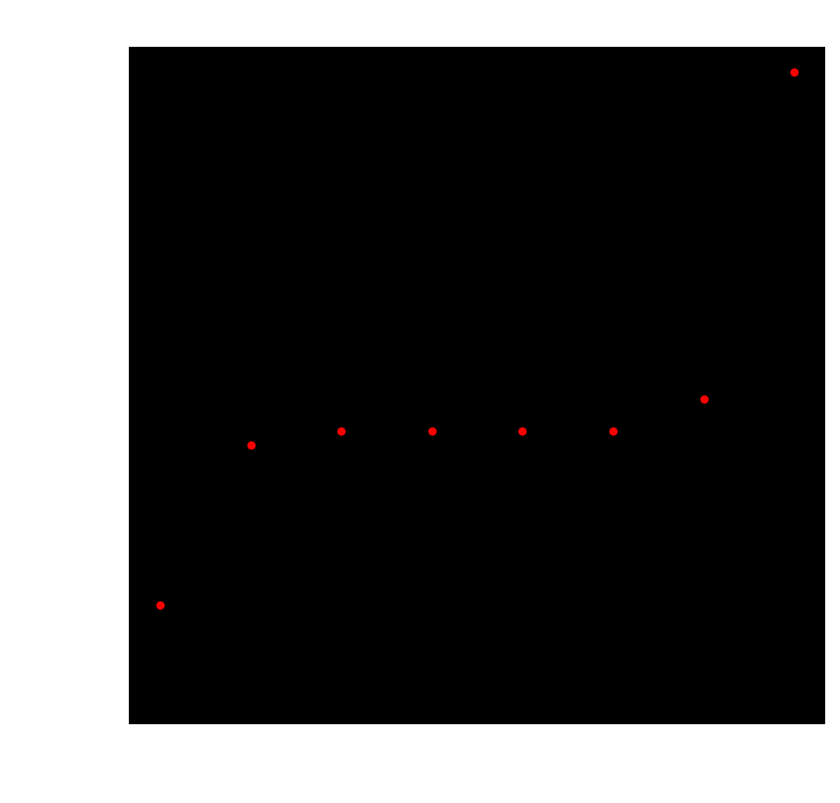

In [9]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
Points = df['Points']
Values = df['Values']
plt.scatter(Points, Values, marker=".", color="red")
plt.xticks(np.arange(-3, 5, 1))
plt.yticks(np.arange(-7000,9000,3000))
plt.title("Points vs Values")
plt.xlabel("Points")
plt.ylabel("Values")
plt.savefig("Images/Points_vs_Values.png",bbox_inches='tight')

## Elbow Curve Drawing

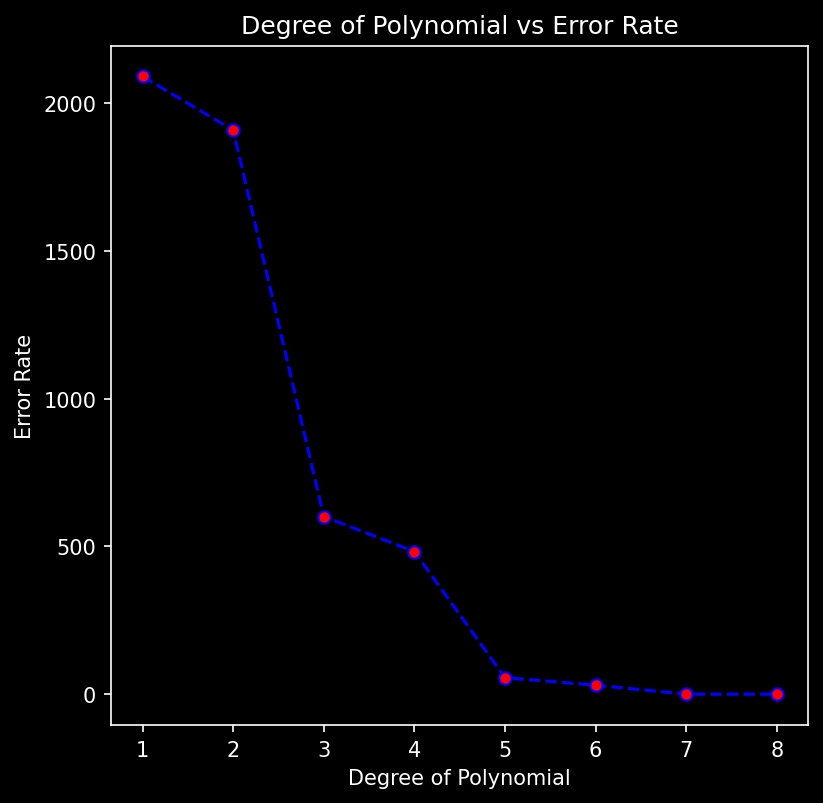

In [10]:
rmse=[]
for i in range(1, 9):
    poly_reg = PolynomialFeatures(degree=i)
    x_poly= poly_reg.fit_transform(X)
    lin_reg= LinearRegression()
    lin_reg.fit(x_poly, y)
    y_pred= lin_reg.predict(x_poly)
    rmse.append(mean_squared_error(y, y_pred, squared=False))
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
plt.plot(range(1,9),rmse,linestyle='dashed',color='blue',marker='o',markerfacecolor='red')
plt.xticks(np.arange(1, 9, 1))
plt.yticks(np.arange(0,2500,500))
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error Rate')
plt.title('Degree of Polynomial vs Error Rate')
plt.savefig("Images/Degree_of_Polynomial_vs_Error_Rate.png",bbox_inches='tight')

## Taking the optimal degree of the polynomial and building the model

In [11]:
poly_reg = PolynomialFeatures(degree=5)
x_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
y_pred = lin_reg.predict(x_poly)

## Performance of the model

In [12]:
# printing the coefficient of determination of the regression
print("The coefficient of determination :", r2_score(y,y_pred))
adjusted_r2_score = 1 - ((1-r2_score(y,y_pred))*(len(y)-1))/(len(y)-X.shape[1]-1)
print("The adjusted coefficient of determination :", adjusted_r2_score)

The coefficient of determination : 0.9997151398439568
The adjusted coefficient of determination : 0.9996676631512829


## Plotting the Regression

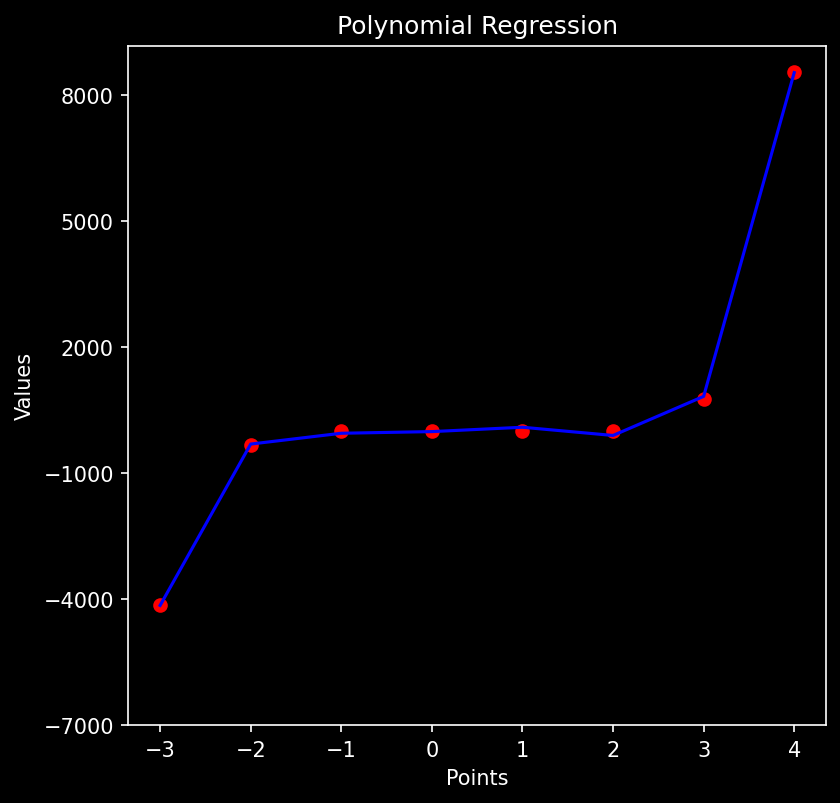

In [13]:
plt.figure(figsize=(6, 6), dpi=150)
plt.style.use('dark_background')
plt.scatter(X, y, color='red')
plt.plot(X, y_pred, color='blue')
plt.xticks(np.arange(-3, 5, 1))
plt.yticks(np.arange(-7000,9000,3000))
plt.xlabel("Points")
plt.ylabel("Values")
plt.title("Polynomial Regression")
plt.savefig("Images/Polynomial_Regression.png",bbox_inches='tight')

## Additional Performance Metrics

In [14]:
print('Mean Absolute Error (MAE) :', mean_absolute_error(y, y_pred))
print('Mean Squared Error (MSE) :', mean_squared_error(y, y_pred))
print('Root Mean Squared Error (RMSE) :', mean_squared_error(y, y_pred, squared=False))

Mean Absolute Error (MAE) : 43.531468531467624
Mean Squared Error (MSE) : 3134.2657342657294
Root Mean Squared Error (RMSE) : 55.98451334311775
